## 1. Fitting polinomial predictors to data

In [1]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ggplot2'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Dafne\anaconda3\envs\r_enviroment\Lib\R\library\00LOCK\ggplot2\help\figures\logo.png  a C:\Users\Dafne\anaconda3\envs\r_enviroment\Lib\R\library\ggplot2\help\figures\logo.png: Permission denied"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Dafne\anaconda3\envs\r_enviroment\Lib\R\library\00LOCK\ggplot2\help\figures\README-example-1.png  a C:\Users\Dafne\anaconda3\envs\r_enviroment\Lib\R\library\ggplot2\help\figures\README-example-1.png: Permission denied"
Warning message:
"restored 'ggplot2'"



The downloaded binary packages are in
	C:\Users\Dafne\AppData\Local\Temp\RtmpsJA08s\downloaded_packages


In [3]:
install.packages("caTools")
library(caTools)


also installing the dependency 'bitops'




package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dafne\AppData\Local\Temp\RtmpsJA08s\downloaded_packages


In [12]:
library(ggplot2)
library(caTools)

### Let's repeat the excercise but in R noting the diferences in coding. Notice that the results might slightly vary due to the fact that we did not specify a seed.

### First, we generate the feature

In [13]:
W <- runif(1000,0,1)
W <- sort(W)
print(W)

   [1] 1.616473e-05 1.190012e-03 1.658970e-03 2.208626e-03 4.195218e-03
   [6] 8.481375e-03 9.992019e-03 1.004348e-02 1.167727e-02 1.226293e-02
  [11] 1.256782e-02 1.360444e-02 1.406577e-02 1.509032e-02 1.578653e-02
  [16] 1.603400e-02 1.630419e-02 1.733674e-02 2.043255e-02 2.090270e-02
  [21] 2.174659e-02 2.187741e-02 2.317411e-02 2.347601e-02 2.428406e-02
  [26] 2.546901e-02 2.982822e-02 3.107302e-02 3.134560e-02 3.197360e-02
  [31] 3.278099e-02 3.318550e-02 3.350581e-02 3.496498e-02 3.668856e-02
  [36] 4.079711e-02 4.364789e-02 4.372381e-02 4.476243e-02 4.809436e-02
  [41] 4.995729e-02 5.042494e-02 5.060749e-02 5.139266e-02 5.372434e-02
  [46] 5.444766e-02 5.468718e-02 5.652326e-02 5.736314e-02 5.821950e-02
  [51] 5.852977e-02 6.171906e-02 6.175835e-02 6.301338e-02 6.496550e-02
  [56] 6.657699e-02 7.192106e-02 7.287748e-02 7.288072e-02 7.503600e-02
  [61] 7.504176e-02 7.598354e-02 7.717689e-02 7.941904e-02 7.994933e-02
  [66] 8.195630e-02 8.586649e-02 8.678376e-02 8.869606e-02 8.887

### Then, the noise

In [14]:
e <- rnorm(1000,0,1)
print(e)

   [1]  1.7231937235  0.0815225184 -0.0447062140  0.7878268193  0.0131517557
   [6]  0.1983262226  0.2645436730  0.6848800792 -0.9397069713 -0.5489997129
  [11]  1.3117275252 -0.0932977040  0.9556202697 -0.3608460088 -1.0377869208
  [16] -0.5524628830 -0.5713839459  0.3929725456  2.2454195925  1.4285887801
  [21]  1.6744414838 -0.2982821774 -0.4365973731 -1.5103725625  0.7361585693
  [26]  0.1511469678 -0.3512572251 -0.8029481202 -1.8845708331  1.9468710685
  [31]  0.1229431042 -0.3666729532 -1.4171055142 -1.0183001801 -0.3135051508
  [36] -0.7815413230  1.2372042032  0.2950825789 -0.9669528369  0.4522990309
  [41]  1.2246857057  0.0878705443  1.4350615336  1.5613396286  0.4142708775
  [46] -0.8209297541  1.0209641568  1.0604528119  1.0388795449  0.3054754469
  [51]  0.1875066707  0.4905780945 -1.2648451765  0.3643569255 -1.6563074509
  [56] -0.1429708524  2.6367329950  0.4903561649  0.0583163198  0.4781054054
  [61]  0.0875017537  1.5563130702 -0.8665857992 -1.2892958576 -0.5319379029

### And finally, the dependent variable

In [15]:
y <- exp(4*W) + e

### Estimation is similar to Python. We use a function called "lm" to fit a linear model

In [16]:
model <- lm(y~W)
y_hat <- model$fitted.values

### To plot in R, we can use base R plot functions or ggplot2, as we do here. ggplot2 tends to be a better option to plot complex graph. As in Python, we create a figure where we will plot all the lines, dots, etc.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


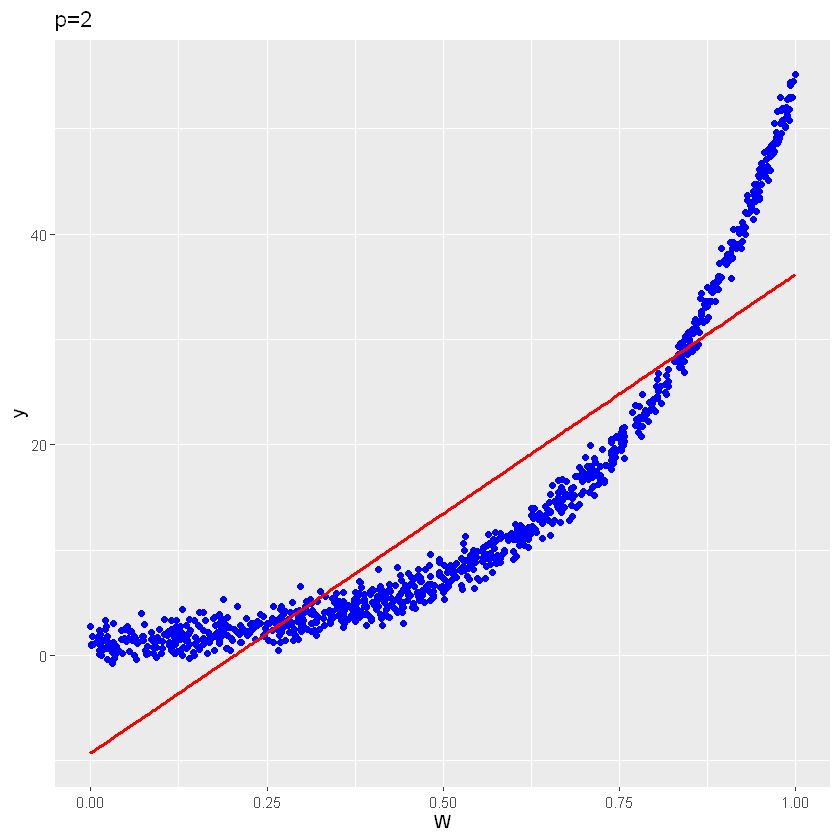

In [17]:
ggplot()+
geom_point(data= data.frame(W,y), aes(x=W,y=y), color = 'blue')+
geom_line(data= data.frame(W,y_hat), aes(x=W,y=y_hat), size = 1, color = 'red')+
ggtitle("p=2")

### Now, let's fit a cuadratic predictor. We can create a dataframe to store all the variables

In [18]:
data <- data.frame(y,W,W^2)
data

y,W,W.2
<dbl>,<dbl>,<dbl>
2.72325838,1.616473e-05,2.612986e-10
1.08629391,1.190012e-03,1.416128e-06
0.96195173,1.658970e-03,2.752183e-06
1.79670046,2.208626e-03,4.878030e-06
1.03007422,4.195218e-03,1.759986e-05
1.23283376,8.481375e-03,7.193372e-05
1.30532122,9.992019e-03,9.984044e-05
1.72587189,1.004348e-02,1.008715e-04
0.10811018,1.167727e-02,1.363587e-04


### To fit the model, we now need to specify the dataset in the "data" argument. Notice that, eventhough the model is non linear in features, it is still linear in parameters, so the "lm" function is appropriate.

In [19]:
model <- lm(y~W + W.2, data= data)
y_hat <- model$fitted.values

### And we can plot the fit of the cuadratic predictor

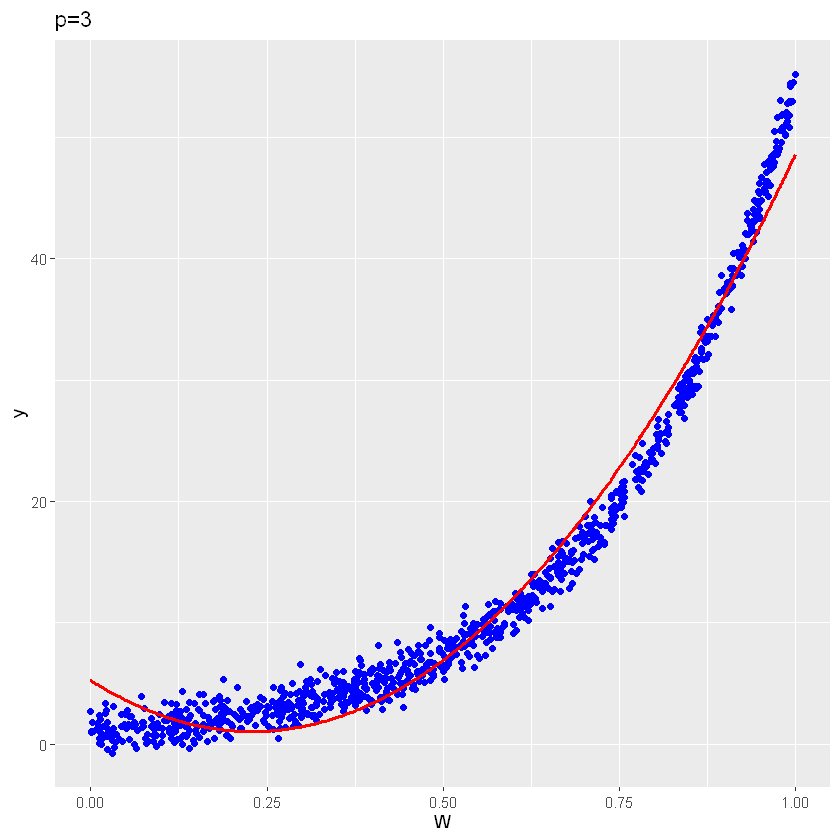

In [20]:
ggplot()+
geom_point(data= data.frame(W,y), aes(x=W,y=y), color = 'blue')+
geom_line(data= data.frame(W,y_hat), aes(x=W,y=y_hat), size = 1, color = 'red')+
ggtitle("p=3")

### Finally, we fit the cubic predictor to the data

In [21]:
data <- data.frame(y,W,W^2,W^3)
data

y,W,W.2,W.3
<dbl>,<dbl>,<dbl>,<dbl>
2.72325838,1.616473e-05,2.612986e-10,4.223822e-15
1.08629391,1.190012e-03,1.416128e-06,1.685208e-09
0.96195173,1.658970e-03,2.752183e-06,4.565791e-09
1.79670046,2.208626e-03,4.878030e-06,1.077375e-08
1.03007422,4.195218e-03,1.759986e-05,7.383524e-08
1.23283376,8.481375e-03,7.193372e-05,6.100969e-07
1.30532122,9.992019e-03,9.984044e-05,9.976075e-07
1.72587189,1.004348e-02,1.008715e-04,1.013101e-06
0.10811018,1.167727e-02,1.363587e-04,1.592298e-06


In [22]:
model <- lm(y~W + W.2 + W.3, data= data)
y_hat <- model$fitted.values

## And plot the results

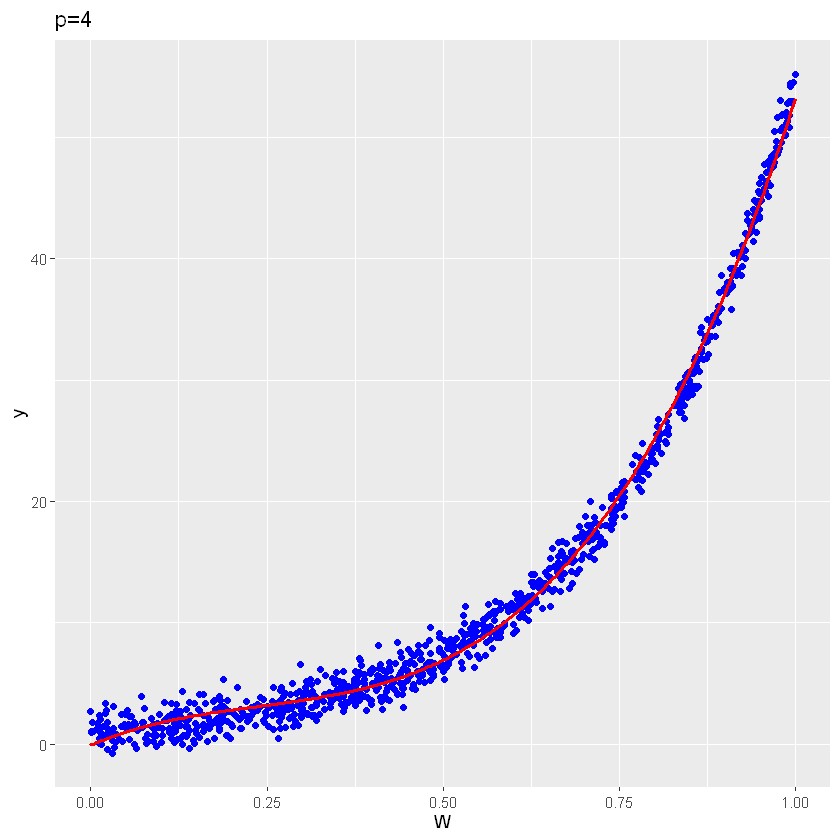

In [23]:
ggplot()+
geom_point(data= data.frame(W,y), aes(x=W,y=y), color = 'blue')+
geom_line(data= data.frame(W,y_hat), aes(x=W,y=y_hat), size = 1, color = 'red')+
ggtitle("p=4")

## 2. Overfitting

### Now, in the overfitting section, we construct the random matrix/vector to fit a linear model. As we did in Python, we start with $p=n=1000$

In [24]:
X <- matrix(rnorm(1000*(1000-1), 0, 1), nrow =1000, ncol = 1000-1 )
y <- rnorm(1000, 0, 1)

data <- data.frame(y,X)
dim(data)
dim(X)

[1] 1000 1000

[1] 1000  999

### We fit the model and calculate de MSE

In [25]:
model <- lm(y~., data= data)
mse <- mean((y - model$fitted.values)^2)
mse

[1] 0

## and the R-squared

In [26]:
R_sq <- 1 - mse/mean((y - mean(y))^2)
R_sq

[1] 1

### Now, we analyse the case where $p=\frac{n}{2}=500$. First we construct the data

In [27]:
X <- matrix(rnorm(1000*(500-1), 0, 1), nrow =1000, ncol = 500-1 )
data <- data.frame(y,X)
dim(data)

[1] 1000  500

### Fit the model and calculate the MSE

In [28]:
model <- lm(y~., data= data)
mse <- mean((y - model$fitted.values)^2)
mse

[1] 0.5308414

## Calculate the R-squared

In [29]:
R_sq <- 1 - mse/mean((y - mean(y))^2)
R_sq

[1] 0.4623511

### And the adjusted R-squared

In [30]:
adj_mse <- 1000/500*mse
adjR_sq <- 1 - adj_mse/mean((y-mean(y))^2)
adjR_sq

[1] -0.0752978

### Finally, we analyse the case where $p=\frac{n}{20}=50$

In [31]:
X <- matrix(rnorm(1000*(50-1), 0, 1), nrow =1000, ncol = 50-1 )
data <- data.frame(y,X)
dim(data)

[1] 1000   50

### We fit the model and calculate the MSE

In [32]:
model <- lm(y~., data= data)
mse <- mean((y - model$fitted.values)^2)
mse

[1] 0.9451788

### Calculate the R-squared

In [33]:
R_sq <- 1 - mse/mean((y - mean(y))^2)
R_sq

[1] 0.04270029

### And the adjusted R-squared

In [34]:
adj_mse <- 1000/500*mse
adjR_sq <- 1 - adj_mse/mean((y-mean(y))^2)
adjR_sq

[1] -0.9145994

## 3. Data splitting

### In the final section, we will split the sample of the same three predictors we worked with in Python and assess out of sample accuracy

### To do that, we work with the data generating process of section 1

In [35]:
# Features

W <- runif(1000,0,1)
W <- sort(W)

# Noise

e <- rnorm(1000,0,1)

# Dependent variable

y <- exp(4*W) + e

### Then, we create dataframes that store the variables of these models

In [36]:
data_1 <- data.frame(y,W)
data_2 <- data.frame(y,W,W^2)
data_3 <- data.frame(y,sin(W))

### With the help of "caTools" package's function "sample.split", we can easily divide each sample into training and test sets.

In [37]:
sample_1 <- sample.split(data_1$y, SplitRatio = 0.75)
train_1 <- subset(data_1, sample_1 == TRUE)
test_1 <- subset(data_1, sample_1 == FALSE)

sample_2 <- sample.split(data_2$y, SplitRatio = 0.75)
train_2 <- subset(data_2, sample_2 == TRUE)
test_2 <- subset(data_2, sample_2 == FALSE)

sample_3 <- sample.split(data_3$y, SplitRatio = 0.75)
train_3 <- subset(data_3, sample_3 == TRUE)
test_3 <- subset(data_3, sample_3 == FALSE)

### Now, we fit the models with the training set

In [38]:
model_1 <- lm(y~., data= train_1)
model_1


Call:
lm(formula = y ~ ., data = train_1)

Coefficients:
(Intercept)            W  
     -8.274       43.458  


In [39]:
model_2 <- lm(y~., data= train_2)
model_2


Call:
lm(formula = y ~ ., data = train_2)

Coefficients:
(Intercept)            W          W.2  
      5.044      -35.447       78.166  


In [40]:
model_3 <- lm(y~., data= train_3)
model_3


Call:
lm(formula = y ~ ., data = train_3)

Coefficients:
(Intercept)       sin.W.  
     -9.207       48.388  


### And finally, we calculate out of sample goodness of fit.

In [41]:
y_1_test = test_1$y
y_2_test = test_2$y
y_3_test = test_3$y

In [42]:
y_1_hat_test = predict(model_1, test_1["W"])
y_2_hat_test = predict(model_2, test_2[c("W","W.2")])
y_3_hat_test = predict(model_3, test_3["sin.W."])

In [43]:
# MSE

mse_1_test = mean((y_1_test - y_1_hat_test)^2)
mse_2_test = mean((y_2_test - y_2_hat_test)^2)
mse_3_test = mean((y_3_test - y_3_hat_test)^2)

print(paste0("MSE out of sample of predictor 1 is ", mse_1_test))
print(paste0("MSE out of sample of predictor 2 is ", mse_2_test))
print(paste0("MSE out of sample of predictor 3 is ", mse_3_test))

R_sq_1_test = 1 - mse_1_test / mean((y_1_test-mean(y_1_test))^2)
R_sq_2_test = 1 - mse_2_test / mean((y_2_test-mean(y_2_test))^2)
R_sq_3_test = 1 - mse_3_test / mean((y_3_test-mean(y_3_test))^2)

print(paste0("R-squared out of sample of predictor 1 is ", R_sq_1_test))
print(paste0("R-squared out of sample of predictor 2 is ", R_sq_2_test))
print(paste0("R-squared out of sample of predictor 3 is ", R_sq_3_test))

adj_mse_1_test = 250 / (250-2) * mse_1_test
adjR_sq_1_test = 1 - adj_mse_1_test / mean((y_1_test-mean(y_1_test))^2)

adj_mse_2_test = 250 / (250-3) * mse_2_test
adjR_sq_2_test = 1 - adj_mse_2_test / mean((y_2_test-mean(y_2_test))^2)

adj_mse_3_test = 250 / (250-2) * mse_3_test
adjR_sq_3_test = 1 - adj_mse_3_test / mean((y_3_test-mean(y_3_test))^2)

print(paste0("Adjusted R-squared out of sample of predictor 1 is ", adjR_sq_1_test))
print(paste0("Adjusted R-squared out of sample of predictor 2 is ", adjR_sq_2_test))
print(paste0("Adjusted R-squared out of sample of predictor 3 is ", adjR_sq_3_test))


[1] "MSE out of sample of predictor 1 is 28.9821750084983"
[1] "MSE out of sample of predictor 2 is 4.46337317063709"
[1] "MSE out of sample of predictor 3 is 47.9272670620454"
[1] "R-squared out of sample of predictor 1 is 0.793162428296024"
[1] "R-squared out of sample of predictor 2 is 0.977758477487828"
[1] "R-squared out of sample of predictor 3 is 0.740402216727285"
[1] "Adjusted R-squared out of sample of predictor 1 is 0.791494383362927"
[1] "Adjusted R-squared out of sample of predictor 2 is 0.977488337538287"
[1] "Adjusted R-squared out of sample of predictor 3 is 0.738308686217021"
